<a href="https://colab.research.google.com/github/Arseniy-Polyakov/Python_Course/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22img_filtering_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Pug_-_1_year_Old_%28cropped%29.jpg/640px-Pug_-_1_year_Old_%28cropped%29.jpg -O 'example.jpg'

--2024-11-16 12:23:22--  https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Pug_-_1_year_Old_%28cropped%29.jpg/640px-Pug_-_1_year_Old_%28cropped%29.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89369 (87K) [image/jpeg]
Saving to: ‘example.jpg’

example.jpg         100%[===================>]  87.27K  --.-KB/s    in 0.09s   

2024-11-16 12:23:22 (926 KB/s) - ‘example.jpg’ saved [89369/89369]



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

array([[[181, 184, 203],
        [182, 185, 204],
        [183, 186, 203],
        ...,
        [154,  98,  73],
        [152,  96,  71],
        [150,  94,  69]],

       [[182, 185, 204],
        [182, 185, 204],
        [183, 186, 203],
        ...,
        [154,  98,  73],
        [152,  96,  71],
        [150,  94,  69]],

       [[182, 185, 202],
        [182, 185, 202],
        [183, 186, 203],
        ...,
        [153,  97,  72],
        [151,  95,  70],
        [150,  94,  69]],

       ...,

       [[181, 174, 156],
        [182, 175, 157],
        [182, 175, 157],
        ...,
        [240, 217, 186],
        [237, 214, 183],
        [235, 212, 181]],

       [[180, 173, 155],
        [181, 174, 156],
        [181, 174, 156],
        ...,
        [238, 215, 184],
        [239, 216, 185],
        [240, 217, 186]],

       [[179, 172, 154],
        [180, 173, 155],
        [181, 174, 156],
        ...,
        [237, 214, 183],
        [239, 216, 185],
        [243, 220, 189]]], dtype=uint8)
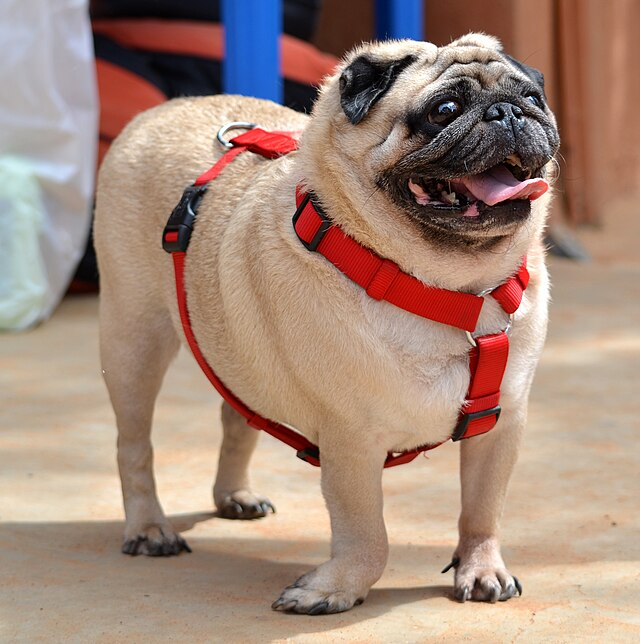

In [ ]:
from PIL import Image

image = Image.open('example.jpg')
image = np.array(image)
image

In [ ]:
# фильтр rgb
color_transformation_matrix = np.array([
    [1.2, 0.0, 0.0],
    [0.0, 1.9, 0.0],
    [0.0, 0.0, 0.4]
])

color_transformation_matrix

array([[1.2, 0. , 0. ],
       [0. , 1.9, 0. ],
       [0. , 0. , 0.4]])

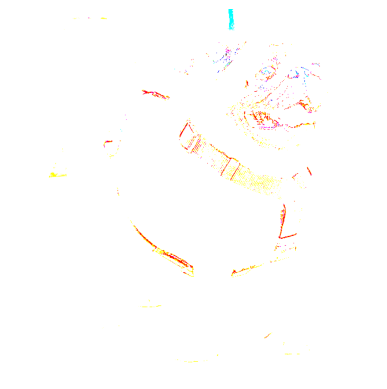

In [ ]:
# матричное умножение
transformed_image = np.dot(image, color_transformation_matrix.T)

plt.axis('off')
plt.imshow(transformed_image)

In [ ]:
image[0], transformed_image[0]

(array([[181, 184, 203],
        [182, 185, 204],
        [183, 186, 203],
        ...,
        [154,  98,  73],
        [152,  96,  71],
        [150,  94,  69]], dtype=uint8),
 array([[217.2, 349.6,  81.2],
        [218.4, 351.5,  81.6],
        [219.6, 353.4,  81.2],
        ...,
        [184.8, 186.2,  29.2],
        [182.4, 182.4,  28.4],
        [180. , 178.6,  27.6]]))

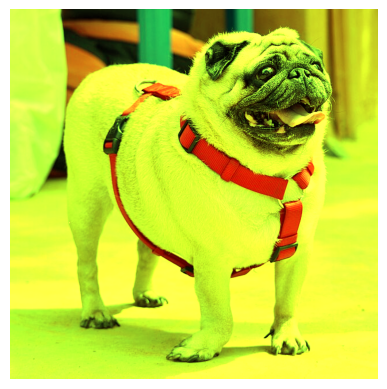

In [ ]:
# клиппинг, конвертация к целочисленному виду
transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

plt.axis('off')
plt.imshow(transformed_image)

In [ ]:
image[0], transformed_image[0]

(array([[181, 184, 203],
        [182, 185, 204],
        [183, 186, 203],
        ...,
        [154,  98,  73],
        [152,  96,  71],
        [150,  94,  69]], dtype=uint8),
 array([[217, 255,  81],
        [218, 255,  81],
        [219, 255,  81],
        ...,
        [184, 186,  29],
        [182, 182,  28],
        [180, 178,  27]], dtype=uint8))

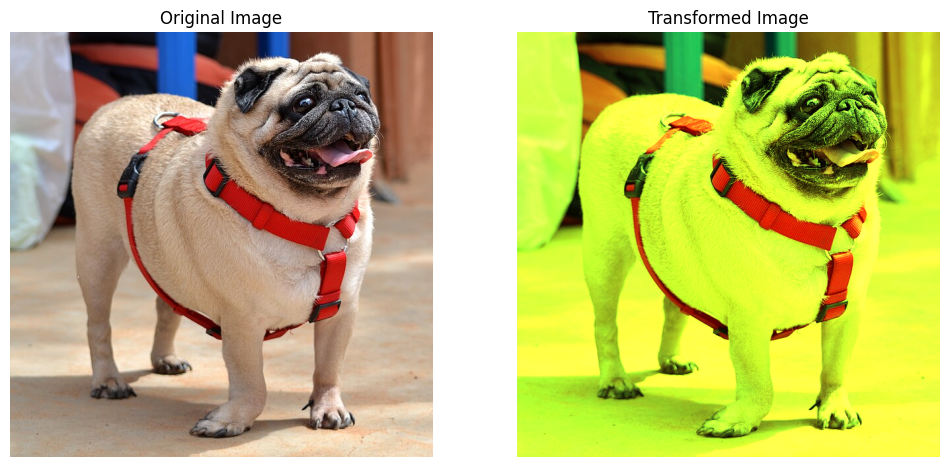

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.show()

Матричное произведение

In [ ]:
# задаем 2 матрицы
matrix_a = np.array([[1, 2, 3],
                     [4, 5, 6]])

matrix_b = np.array([[6, 5, 4],
                     [3, 2, 1]]).T

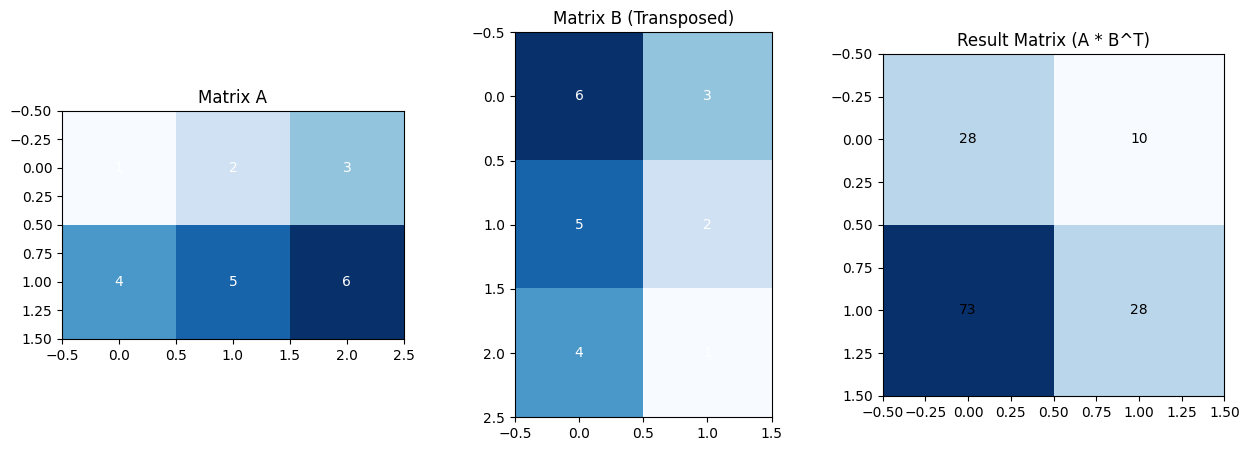

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(matrix_a, cmap='Blues', interpolation='nearest')
axes[0].set_title('Matrix A')
for i in range(matrix_a.shape[0]):
    for j in range(matrix_a.shape[1]):
        axes[0].text(j, i, str(matrix_a[i, j]), ha='center', va='center', color='white')

axes[1].imshow(matrix_b, cmap='Blues', interpolation='nearest')
axes[1].set_title('Matrix B (Transposed)')
for i in range(matrix_b.shape[0]):
    for j in range(matrix_b.shape[1]):
        axes[1].text(j, i, str(matrix_b[i, j]), ha='center', va='center', color='white')

axes[2].imshow(np.dot(matrix_a, matrix_b), cmap='Blues', interpolation='nearest')
axes[2].set_title('Result Matrix (A * B^T)')
for i in range(np.dot(matrix_a, matrix_b).shape[0]):
    for j in range(np.dot(matrix_a, matrix_b).shape[1]):
        axes[2].text(j, i, str(np.dot(matrix_a, matrix_b)[i, j]), ha='center', va='center', color='black')

plt.show()